In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'Black_wf_WholeBrain'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
            if os.path.isdir(os.path.join(data_directory, name))]

In [3]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [4]:
def load_subject(subject, data_directory, threshold, em='both'):
    file_suffix = 'cells_' + str(threshold)
    df_mouse = pd.read_csv(data_directory + subject + '/' + file_suffix + '.csv')
    if em=='both':
        df_mouse = ace.reformat_df_mouse(df=df_mouse)
    elif em=='sx':
        df_mouse = ace.reformat_df_mouse(df=df_mouse[df_mouse[' x']<228].reset_index(drop=True))
    elif em=='dx':
        df_mouse = ace.reformat_df_mouse(df=df_mouse[df_mouse[' x']>228].reset_index(drop=True))
    else:
        return ValueError('em input not valid')
    return df_mouse

# Analysis on Black with father Whole Brain

In [5]:
dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject=subject, 
                                                                                               data_directory=data_directory,
                                                                                              threshold=2500,
                                                                                               em='dx'), 
                                                                         vol=volumes, 
                                                                         level=8) for subject in subjects}
np.save('dict_results/dict_results_across_mice_Black_wf_WholeBrain_unfiltered2500_emDX.npy', dict_results_across_mice)

/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/pytho

In [8]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_Black_wf_WholeBrain_unfiltered2500_emDX.npy', 
                                   allow_pickle=True).item()

In [9]:
subjects = list(dict_results_across_mice.keys())

# List areas with null cell count

In [10]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}

# List areas with no volume

In [11]:
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}

# Divide mice into experimental groups: FAM/UNFAM/CONTROL

In [12]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
experimental_groups

{'Control': ['BL53Control', 'BL45Control', 'BL51Control'],
 'Fam': ['BL49Fam', 'BL47Fam', 'BL50Fam'],
 'Unfam': ['BL48Unfam', 'BL54Unfam', 'BL52Unfam', 'BL46Unfam']}

# Calculate cell count across experimental groups

In [13]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [14]:
df_control_cell_count.set_index('area').sum()

BL53Control    29084
BL45Control    47093
BL51Control    44173
dtype: int64

In [15]:
df_fam_cell_count.set_index('area').sum()

BL49Fam    40180
BL47Fam    45959
BL50Fam    49253
dtype: int64

In [16]:
df_unfam_cell_count.set_index('area').sum()

BL48Unfam    43347
BL54Unfam    25408
BL52Unfam    29065
BL46Unfam    29777
dtype: int64

# Look at cell count per area

In [17]:
df_control_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL53Control     89
BL45Control    208
BL51Control    210
Name: Medial amygdalar nucleus, dtype: int64

In [18]:
df_fam_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL49Fam    1031
BL47Fam     624
BL50Fam     777
Name: Medial amygdalar nucleus, dtype: int64

In [19]:
df_unfam_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL48Unfam    387
BL54Unfam    490
BL52Unfam    261
BL46Unfam    373
Name: Medial amygdalar nucleus, dtype: int64

In [20]:
df_control_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL53Control    12
BL45Control     8
BL51Control     6
Name: Ventral premammillary nucleus, dtype: int64

In [21]:
df_fam_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL49Fam    219
BL47Fam    169
BL50Fam    111
Name: Ventral premammillary nucleus, dtype: int64

In [22]:
df_unfam_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL48Unfam    45
BL54Unfam    59
BL52Unfam    97
BL46Unfam    62
Name: Ventral premammillary nucleus, dtype: int64

In [23]:
df_control_cell_count.set_index('area').loc['Main olfactory bulb']

BL53Control    1081
BL45Control    1370
BL51Control    1249
Name: Main olfactory bulb, dtype: int64

In [24]:
df_fam_cell_count.set_index('area').loc['Main olfactory bulb']

BL49Fam    2613
BL47Fam    2921
BL50Fam    1136
Name: Main olfactory bulb, dtype: int64

In [25]:
df_unfam_cell_count.set_index('area').loc['Main olfactory bulb']

BL48Unfam     644
BL54Unfam    1281
BL52Unfam    2616
BL46Unfam    3242
Name: Main olfactory bulb, dtype: int64

In [26]:
df_control_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL53Control    28
BL45Control    49
BL51Control    56
Name: Accessory olfactory bulb, dtype: int64

In [27]:
df_fam_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL49Fam    206
BL47Fam     77
BL50Fam     93
Name: Accessory olfactory bulb, dtype: int64

In [28]:
df_unfam_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL48Unfam     18
BL54Unfam     34
BL52Unfam     68
BL46Unfam    358
Name: Accessory olfactory bulb, dtype: int64

In [61]:
df_control_cell_count.set_index('area').loc['Supramammillary nucleus']

BL53Control    32
BL45Control    61
BL51Control    36
Name: Supramammillary nucleus, dtype: int64

In [62]:
df_fam_cell_count.set_index('area').loc['Supramammillary nucleus']

BL49Fam    56
BL47Fam    47
BL50Fam    71
Name: Supramammillary nucleus, dtype: int64

In [63]:
df_unfam_cell_count.set_index('area').loc['Supramammillary nucleus']

BL48Unfam    30
BL54Unfam    27
BL52Unfam    62
BL46Unfam    31
Name: Supramammillary nucleus, dtype: int64

## Calculate t-tests across groups per area

In [29]:
df_ttest_ncells = ace.test_across_groups([df_control_cell_count,df_fam_cell_count,df_unfam_cell_count])

In [30]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [31]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:35].set_index('area')

,pval_Control_vs_Fam
area,
Rhomboid nucleus,0.00612226
Cortical amygdalar area,0.00618378
Medial amygdalar nucleus,0.00687155
Ventral premammillary nucleus,0.00725912
Piriform-amygdalar area,0.0129974
Central amygdalar nucleus,0.0130614
Posterior amygdalar nucleus,0.0137938
Basomedial amygdalar nucleus,0.0165969
Lateral posterior nucleus of the thalamus,0.019973


In [32]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']].set_index('area').loc['Ventral premammillary nucleus']

pval_Control_vs_Fam    0.00725912
Name: Ventral premammillary nucleus, dtype: object

In [33]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:15].set_index('area')

,pval_Control_vs_Unfam
area,
Lateral posterior nucleus of the thalamus,0.00136349
Ventral tegmental area,0.00187191
Posterior amygdalar nucleus,0.00360383
Cortical amygdalar area,0.00363401
Ventral premammillary nucleus,0.00745541
Anterior hypothalamic nucleus,0.00895725
Pretectal region,0.020954
Anterior olfactory nucleus,0.0230785
Medial amygdalar nucleus,0.0233682


In [34]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']].set_index('area').loc['Supramammillary nucleus']

pval_Control_vs_Unfam    0.674191
Name: Supramammillary nucleus, dtype: object

In [35]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:40].set_index('area')

,pval_Fam_vs_Unfam
area,
Anteroventral nucleus of thalamus,6.7432e-05
Lateral visual area,0.000680761
Rhomboid nucleus,0.00243936
Subparafascicular area,0.00639093
Superior colliculus motor related,0.0100123
Lateral posterior nucleus of the thalamus,0.0109758
Lateral habenula,0.0112808
Medial amygdalar nucleus,0.0125436
Paraventricular nucleus of the thalamus,0.0143779


In [36]:
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']].set_index('area').loc['Supramammillary nucleus']

pval_Fam_vs_Unfam    0.130551
Name: Supramammillary nucleus, dtype: object

## Calculate cross corr across groups per area on cell count

In [37]:
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)

In [38]:
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)

In [39]:
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

## Plot cross corr matrix across groups per area on cell count

Text(0.5, 1.0, 'CONTROL')

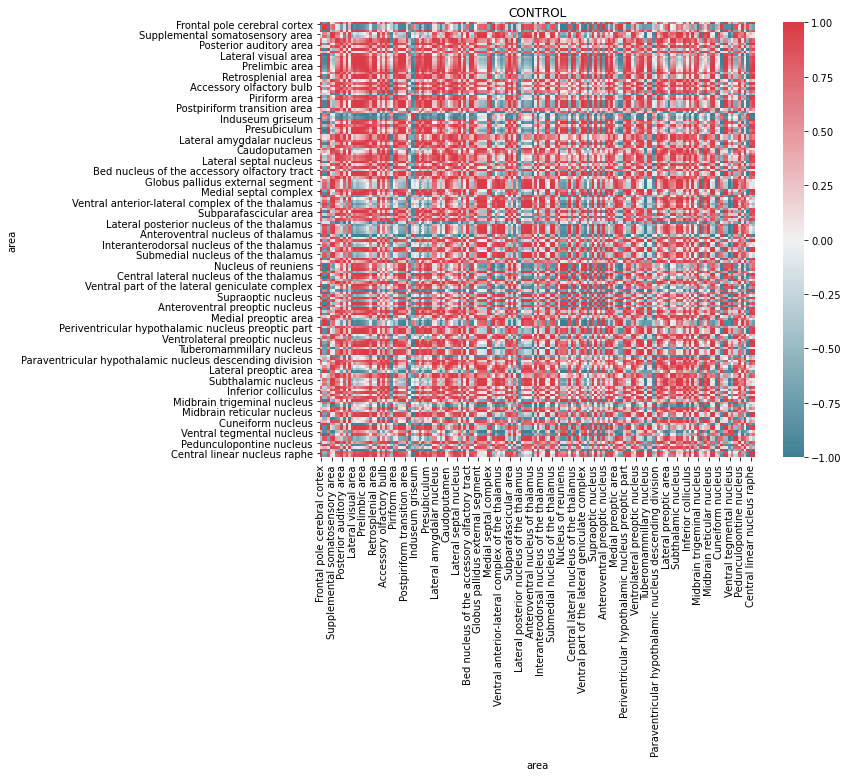

In [40]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

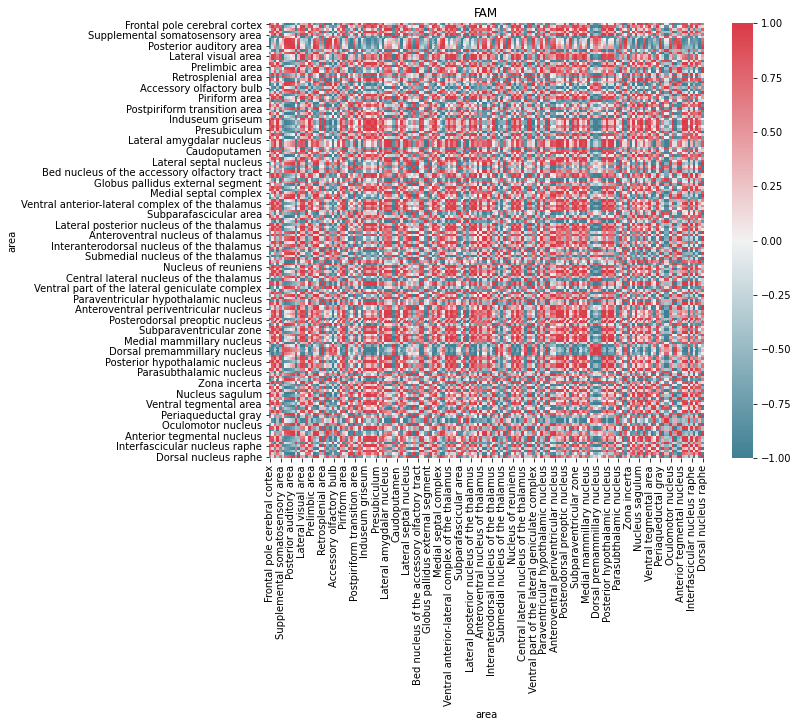

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

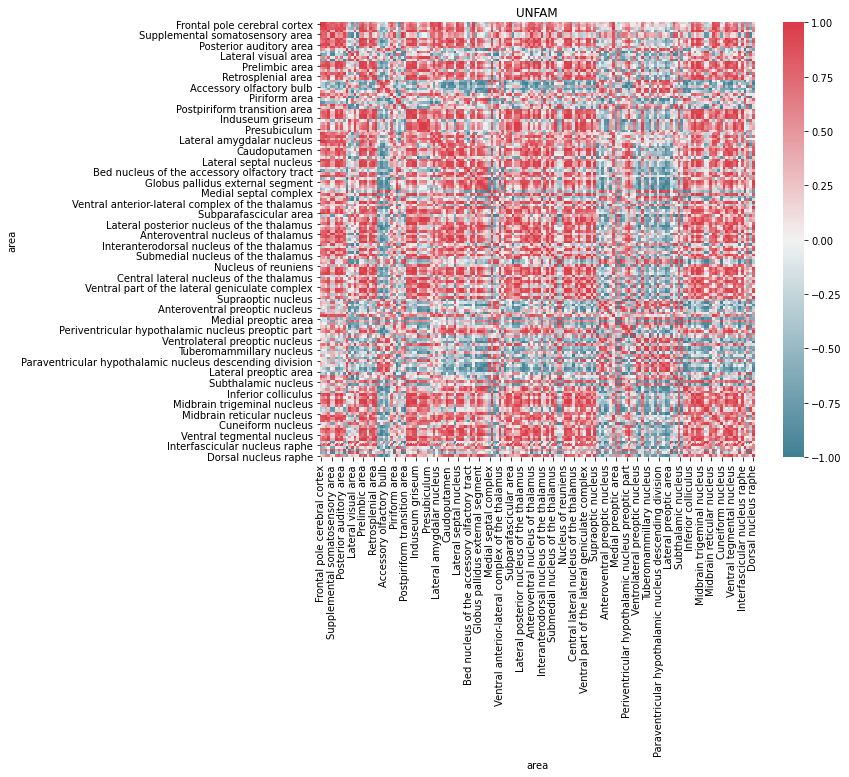

In [42]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate energy across experimental groups

In [43]:
df_control_energy, df_fam_energy, df_unfam_energy = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')

## T-test on energy across groups

In [44]:
df_ttest_energy = ace.test_across_groups([df_control_energy,df_fam_energy,df_unfam_energy])

In [45]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [46]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:10].set_index('area')

,pval_Control_vs_Fam
area,
Ventral premammillary nucleus,0.00668477
Cortical amygdalar area,0.00725425
Rhomboid nucleus,0.00743816
Medial amygdalar nucleus,0.00871185
Piriform-amygdalar area,0.0144961
Lateral posterior nucleus of the thalamus,0.0178637
Central amygdalar nucleus,0.0182211
Posterior amygdalar nucleus,0.0193097
Basomedial amygdalar nucleus,0.0211029


In [47]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:15].set_index('area')

,pval_Control_vs_Unfam
area,
Ventral tegmental area,0.000962924
Lateral posterior nucleus of the thalamus,0.00116597
Cortical amygdalar area,0.00422256
Posterior amygdalar nucleus,0.00443028
Ventral premammillary nucleus,0.010563
Anterior hypothalamic nucleus,0.0107321
Nucleus accumbens,0.0160828
Pretectal region,0.0161472
Anterior olfactory nucleus,0.0164411


In [48]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Anteroventral nucleus of thalamus,0.000148212
Lateral visual area,0.000992122
Rhomboid nucleus,0.00476707
Subparafascicular area,0.00483553
Lateral posterior nucleus of the thalamus,0.00506947
Ventral premammillary nucleus,0.0136285
Medial amygdalar nucleus,0.0139767
Superior colliculus motor related,0.0140978
Lateral habenula,0.0143243


In [49]:
corr_matrix_control_energy = ace.cross_corr(df_control_energy)

In [50]:
corr_matrix_fam_energy = ace.cross_corr(df_fam_energy)

In [51]:
corr_matrix_unfam_energy = ace.cross_corr(df_unfam_energy)

## Plot cross corr matrix across groups per area on energy

Text(0.5, 1.0, 'CONTROL')

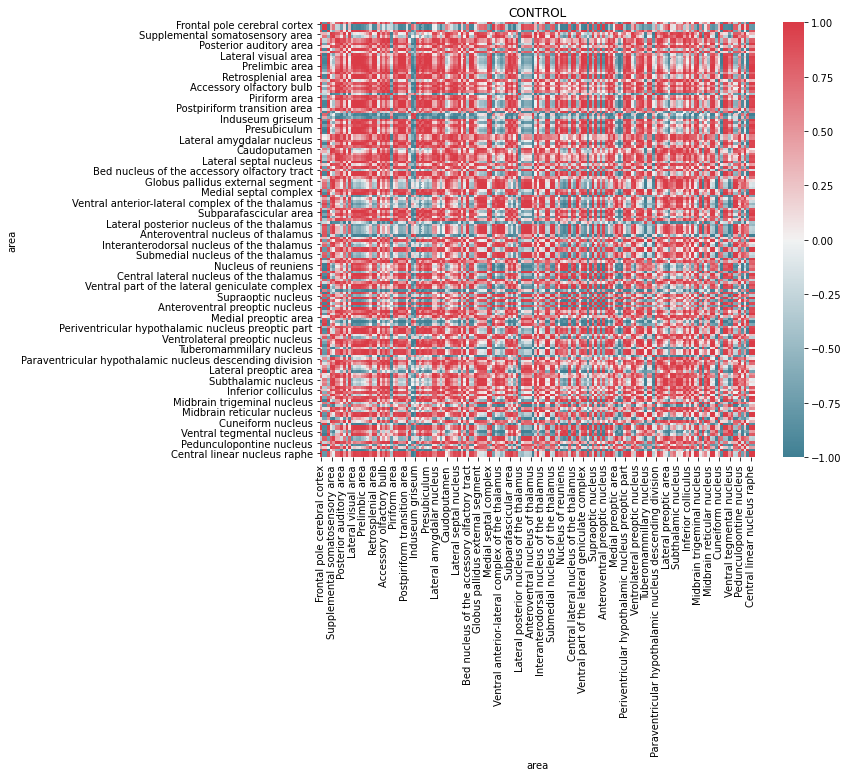

In [52]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

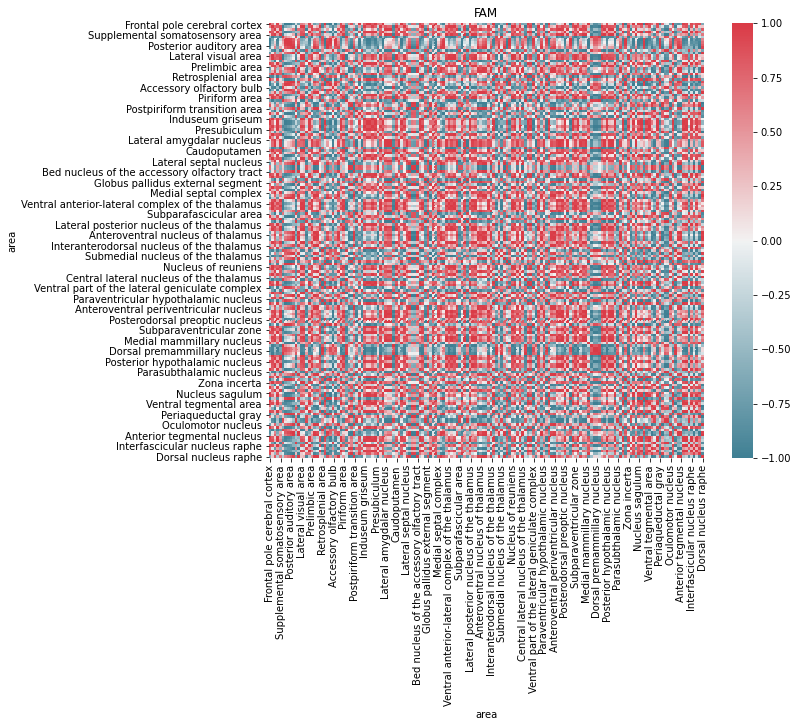

In [53]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

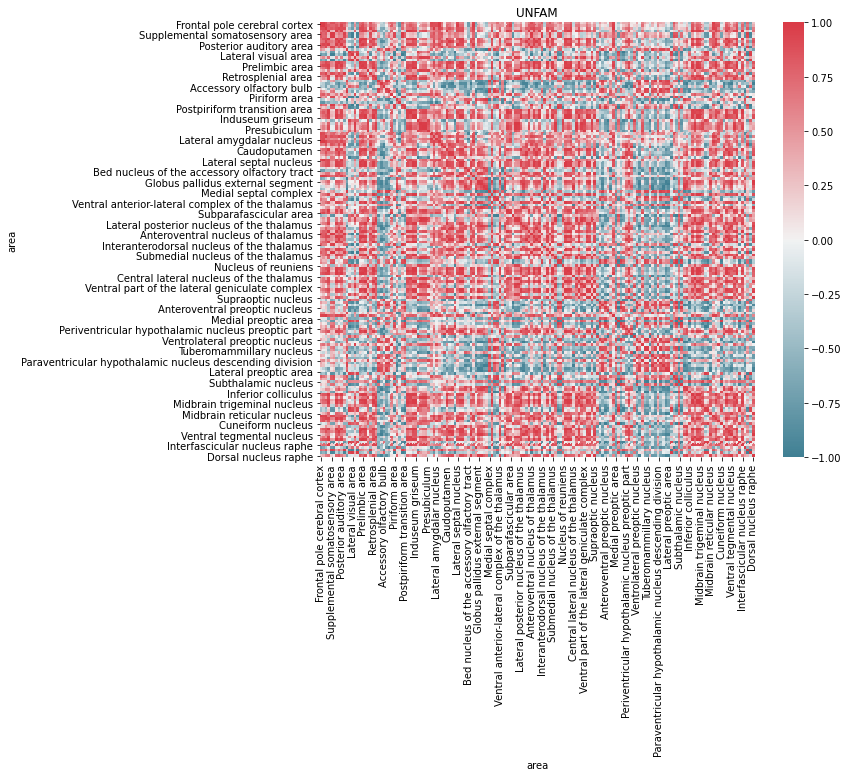

In [54]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate relative density

In [55]:
df_control_rd, df_fam_rd, df_unfam_rd = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='relative_density')

In [56]:
df_ttest_rd = ace.test_across_groups([df_control_rd,df_fam_rd,df_unfam_rd])

In [57]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_rd = df_ttest_rd.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [58]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Postsubiculum,0.00305538
Agranular insular area,0.00440917
Central amygdalar nucleus,0.00816867
Rhomboid nucleus,0.00893522
Parasubthalamic nucleus,0.00907466
Cortical amygdalar area,0.0111676
Basomedial amygdalar nucleus,0.0122971
Piriform-amygdalar area,0.0127165
Ventral premammillary nucleus,0.0186672


In [59]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Lateral septal nucleus,0.000821249
Anterior hypothalamic nucleus,0.00274868
Piriform-amygdalar area,0.00859851
Posterior amygdalar nucleus,0.00931677
Dorsal auditory area,0.00936556
Nucleus accumbens,0.0101096
Medial septal complex,0.0108019
Posterior auditory area,0.0114399
Vascular organ of the lamina terminalis,0.0165359


In [60]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Anteroventral nucleus of thalamus,0.00114434
Rhomboid nucleus,0.00239231
Lateral posterior nucleus of the thalamus,0.00907346
Subparafascicular area,0.0173124
Paraventricular hypothalamic nucleus descending division,0.0509438
Infralimbic area,0.051736
Anterodorsal nucleus,0.0581061
Lateral habenula,0.061137
Reticular nucleus of the thalamus,0.0626081
